# Solving differential equations system 



   Zeit  Substratkonzentration k1  Produktkonzentration k1  \
0     0                100.000000                 0.000000   
1     1                 81.873075                18.126925   
2     2                 67.032005                32.967995   
3     3                 54.881164                45.118836   
4     4                 44.932896                55.067104   

   Substratkonzentration k2  Substratkonzentration k2.1  Unnamed: 5  \
0                100.000000                  100.000000         NaN   
1                 90.483742                   95.122942         NaN   
2                 81.873075                   90.483742         NaN   
3                 74.081822                   86.070798         NaN   
4                 67.032005                   81.873075         NaN   

  Unnamed: 6  Unnamed: 7 Unnamed: 8  
0         a0      100.00     mmol/L  
1         k1        0.20        NaN  
2         k2        0.10        NaN  
3         k3        0.05        NaN  
4        N

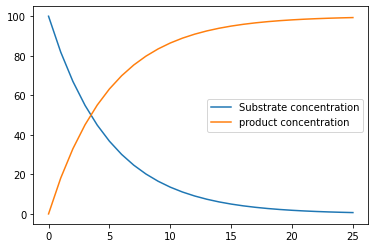

In [6]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(r"reaktionen 1 2 ordnung.xlsx")

print(df.head())


time = df["Zeit"]
substrate = df["Substratkonzentration k1"]
product = df["Produktkonzentration k1"]


fix, ax = plt.subplots()

#ax.plot(time, substrate, label="Substrate concentration")
#ax.plot(time, product, label="product concentration")
#ax.legend()

#plt.show()

[[1.00000000e+02 0.00000000e+00]
 [6.70320046e+01 3.29679954e+01]
 [4.49328963e+01 5.50671037e+01]
 [3.01194212e+01 6.98805788e+01]
 [2.01896519e+01 7.98103481e+01]
 [1.35335283e+01 8.64664717e+01]
 [9.07179532e+00 9.09282047e+01]
 [6.08100625e+00 9.39189938e+01]
 [4.07622038e+00 9.59237796e+01]
 [2.73237223e+00 9.72676278e+01]
 [1.83156388e+00 9.81684361e+01]
 [1.22773398e+00 9.87722660e+01]
 [8.22974698e-01 9.91770253e+01]
 [5.51656437e-01 9.94483436e+01]
 [3.69786368e-01 9.96302136e+01]
 [2.47875215e-01 9.97521248e+01]
 [1.66155725e-01 9.98338443e+01]
 [1.11377513e-01 9.98886225e+01]
 [7.46585809e-02 9.99253414e+01]
 [5.00451444e-02 9.99499549e+01]
 [3.35462655e-02 9.99664537e+01]
 [2.24867352e-02 9.99775133e+01]
 [1.50733100e-02 9.99849267e+01]
 [1.01039424e-02 9.99898961e+01]
 [6.77287547e-03 9.99932271e+01]
 [4.53999440e-03 9.99954600e+01]]


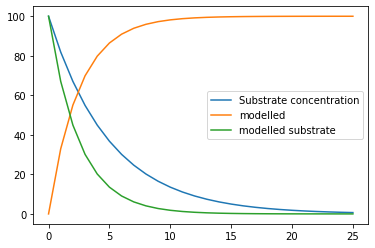

In [59]:
# Definition of DGL system
# A = Initial conditions
# t = time or x-values
# kA = Constant A
# kB = Constant B
y0 = 100

y0_array = [100,0]



def dglsys(Z, t,A0, kA, kB):
    A = Z[0]
    P = Z[1]
    dAdt = -kA*A
    dPdt = kB*(A0-(A0-A))
    dzdt = [dAdt, dPdt]
    return dzdt

sol = odeint(dglsys, y0_array, time, args=(100,0.4, 0.4))
print(sol)

fix, ax = plt.subplots()
ax.plot(time, substrate, label="Substrate concentration")
ax.plot(time, sol[:,1], label="modelled")
ax.plot(time, sol[:,0], label="modelled substrate")
ax.legend()

plt.show()